# WRF perturbations

In this work we compare WRF control output to output in which temperature or moisture have been perturbed around given vertical level(s). The aim is to explore linear response functions as described in [Kuang 2010](https://doi.org/10.1175/2009JAS3260.1).

In [1]:
import modules.wrf_perturbation as wp
import matplotlib.pyplot as plt
import numpy as np
import datetime

print("Report last updated at " + str(datetime.datetime.utcnow()) + ' UTC.')

Report last updated at 2020-08-24 05:54:41.873716 UTC.


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Settings" data-toc-modified-id="Settings-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Settings</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Run-types" data-toc-modified-id="Run-types-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Run types</a></span></li><li><span><a href="#Model-setup" data-toc-modified-id="Model-setup-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model setup</a></span><ul class="toc-item"><li><span><a href="#Initial-profiles" data-toc-modified-id="Initial-profiles-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Initial profiles</a></span></li><li><span><a href="#Vertical-levels" data-toc-modified-id="Vertical-levels-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Vertical levels</a></span></li><li><span><a href="#Surface-temperatures" data-toc-modified-id="Surface-temperatures-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Surface temperatures</a></span></li><li><span><a href="#Fixed-radiative-cooling-profile" data-toc-modified-id="Fixed-radiative-cooling-profile-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Fixed radiative cooling profile</a></span></li><li><span><a href="#Ideal-evaporation-/-surface-fluxes" data-toc-modified-id="Ideal-evaporation-/-surface-fluxes-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Ideal evaporation / surface fluxes</a></span></li><li><span><a href="#Wind-relaxation" data-toc-modified-id="Wind-relaxation-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Wind relaxation</a></span></li><li><span><a href="#Stratospheric-temperature-and-moisture-relaxation" data-toc-modified-id="Stratospheric-temperature-and-moisture-relaxation-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Stratospheric temperature and moisture relaxation</a></span></li></ul></li><li><span><a href="#Perturbation-settings" data-toc-modified-id="Perturbation-settings-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Perturbation settings</a></span><ul class="toc-item"><li><span><a href="#Perturbed-pressure-level" data-toc-modified-id="Perturbed-pressure-level-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Perturbed pressure level</a></span><ul class="toc-item"><li><span><a href="#Kuang-2012" data-toc-modified-id="Kuang-2012-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Kuang 2012</a></span></li><li><span><a href="#Herman-and-Kuang-2013" data-toc-modified-id="Herman-and-Kuang-2013-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Herman and Kuang 2013</a></span></li><li><span><a href="#Our-choice-of-basis-function" data-toc-modified-id="Our-choice-of-basis-function-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Our choice of basis function</a></span></li></ul></li></ul></li><li><span><a href="#Radiative-convective-equilibrium-(RCE)" data-toc-modified-id="Radiative-convective-equilibrium-(RCE)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Radiative-convective equilibrium (RCE)</a></span><ul class="toc-item"><li><span><a href="#Time-series-of-precipitable-water" data-toc-modified-id="Time-series-of-precipitable-water-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Time series of precipitable water</a></span></li><li><span><a href="#Convective-structure-during-RCE" data-toc-modified-id="Convective-structure-during-RCE-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Convective structure during RCE</a></span></li></ul></li><li><span><a href="#Other-profiles-by-time" data-toc-modified-id="Other-profiles-by-time-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Other profiles by time</a></span><ul class="toc-item"><li><span><a href="#Temperature" data-toc-modified-id="Temperature-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Temperature</a></span></li><li><span><a href="#Water-vapour-mixing-ratio" data-toc-modified-id="Water-vapour-mixing-ratio-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Water vapour mixing ratio</a></span></li><li><span><a href="#Relative-humidity" data-toc-modified-id="Relative-humidity-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Relative humidity</a></span></li></ul></li><li><span><a href="#Mean-temperature-and-humidity-profiles-over-RCE-periods" data-toc-modified-id="Mean-temperature-and-humidity-profiles-over-RCE-periods-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Mean temperature and humidity profiles over RCE periods</a></span></li><li><span><a href="#Perturbation-differences-in-averaged-RCE-profiles" data-toc-modified-id="Perturbation-differences-in-averaged-RCE-profiles-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Perturbation differences in averaged RCE profiles</a></span></li><li><span><a href="#Todo" data-toc-modified-id="Todo-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Todo</a></span></li></ul></div>

## Settings

In [2]:
# Input directories with dataset names as keys.
basedir = '/g/data/up6/tr2908/em_quarter_ss/v4.1.4/original_1km/output/'
inputs = {'RCE': basedir+'RCE/',                            # RCE run.
          'Control': basedir+'control/',                    # Control run.
          'Perturbed T, 850 hPa': basedir+'perturb_T_850/', # Perturbed T @ 850 hPa.
          'Perturbed q, 850 hPa': basedir+'perturb_q_850/'} # Perturbed q @ 850 hPa.

# Figure settings.
plt.rcParams['figure.figsize'] = wp.FIGURE_SIZE  # Figure size for non-facetted plots.
plt.rcParams['font.size'] = 14                   # Font size for plots.
plt.rcParams['axes.formatter.useoffset'] = False # Don't use offsets in plots.

# Analysis settings. 
start_times = {'RCE':                  '2000-05-24', # Start date for RCE period (inclusive).
               'Control':              '2000-06-11', # Start date for control run RCE period (inclusive).
               'Perturbed T, 850 hPa': '2000-06-11', # Start date for perturbed T RCE period (inclusive).
               'Perturbed q, 850 hPa': '2000-06-11'} # Start date for perturbed q RCE period (inclusive).
end_times = {'RCE':                  '2000-05-31',   # End date for RCE period (exclusive).
             'Control':              '2000-07-11',   # End date for control run RCE period (exclusive).
             'Perturbed T, 850 hPa': '2000-07-11',   # End date for perturbed T RCE period (exclusive).
             'Perturbed q, 850 hPa': '2000-07-11'}   # End date for perturbed q RCE period (exclusive).
               
plot_levels = [850, 500, 350, 200] # Pressure levels to plot individually [hPa].

## Data preparation

The script `~/code/sh/extract_WRF_variables_parallel.sh` runs, in parallel, a python script that extracts variables of interest from `wrfout` files, optionally interpolates the 3D variables to vertical pressure levels, and takes spatial means across horizontal dimensions. The pressure levels to which the interpolation is done are from 1000 to 100 hPa in 10 hPa increments. These profiles of mean values per time are written to `wrfvar` files, which are then opened here.

In [3]:
wrfvars = wp.read_wrfvars(inputs=inputs, resample="1H")

## Run types

Three runs types are considered:

1. **RCE run**: 
    - From time $t_0$ until radiative-convective equilibrium (RCE) reached at time $t_{RCE}$.
    - No relaxation of stratospheric temperature ($T$) and moisture ($q$).
    - No temperature or moisture perturbations.
    
    
2. **Control run**: 
    - From time $t_{RCE}$ to $t_{end}$.
    - Relaxation of $T$ and $q$ to average profiles in RCE run at RCE.
    - No temperature or moisture perturbations.
    
    
3. **Perturbation runs**:
    - From $t_{RCE}$ to $t_{end}$.
    - Relaxation of $T$ and $q$ to average profiles in RCE run at RCE.
    - Perturbations (separately) on $T$ and $q$.

## Model setup

### Initial profiles

The model is initialised for the RCE run using a prescribed initial sounding/profile from the radiative–convective equilibrium model intercomparison project [(RCEMIP, Wing et al., 2018)](https://doi.org/10.5194/gmd-11-793-2018). Vertical levels are chosen using the [$\eta$-levels notebook](eta_levels.ipynb). Here we do some sanity checks on the `wrfinput` file that stores the initial model state, show basic settings and plot the initial profiles against the input sounding. The initial profiles are interpolated vertically in the `wrfinput` file using the initial sounding, and therefore should be almost identical to the sounding values by height. Note that the control and perturbation runs are restarted using an RCE `wrfrst` restart file, so there are no `wrfinput` files for these other runs.

Sea surface temperature (SST):			301.15 K
Surface skin temperature (TSK):			299.99823 K
Soil temperature at lower boundary (TMN):	299.99823 K
Horizontal grid spacing (DX):			1000.0 m
Horizontal (S-N) grid spacing (DY):		1000.0 m
Horizontal (W-E) domain size:			100 mass points
Horizontal (S-N) domain size:			100 mass points
Vertical domain size:				74 mass points
Maximum geopotential height (model-top):	33170.6 m
Maximum base-state height (on mass points):	32999.0 m
Minimum, mean, maximum between-level distance:	75.0, 451.5, 505.9 m
Model-top pressure:				583.1 Pa
Coriolis sine latitude term (F):		0.0 s-1
Coriolis cosine latitude term (E):		0.0 s-1
Use light nudging on U and V:			False
Ideal evaporation/surface fluxes:		True
Surface wind for ideal surface fluxes:		4.8 m s-1
Constant radiative cooling profile:		True
Relax stratsopheric T and q profiles?		False
Relax U and V to set profiles?			True
Wind relaxation time:				345600.0 s
Physics schemes:
	Microphysics:				8 (Thompson)
	Radiat

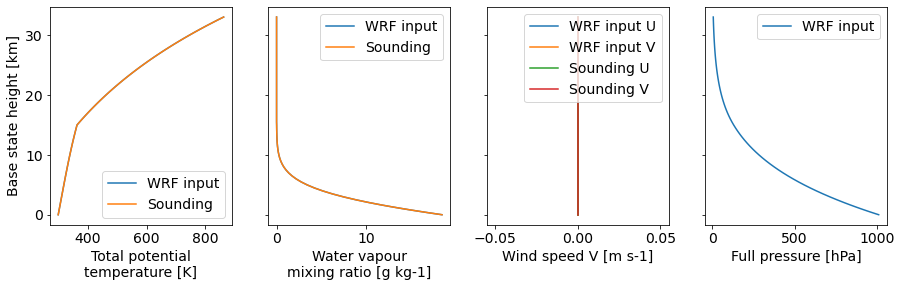

In [4]:
wp.analyse_wrfinput(wrfinput_file=inputs['RCE']+'wrfinput_d01',
                    sounding_file=inputs['RCE']+'input_sounding')

### Vertical levels

The model heights are prescribed using the initial profiles and, at 1 km horizontal resolution, set so that the geopotential heights of the initial model state are  as close as possible to the height suggested for RCEMIP in [Wing et al., 2018](https://doi.org/10.5194/gmd-11-793-2018). Because the vertical levels are not constant in height or pressure (rather in $\eta$-value, see the [$\eta$-levels notebook](eta_levels.ipynb) for details), the vertical height of each level changes over time as the model settles to RCE. The following plot shows a comparison between the initial heights and the mean height of each level in the RCE period.

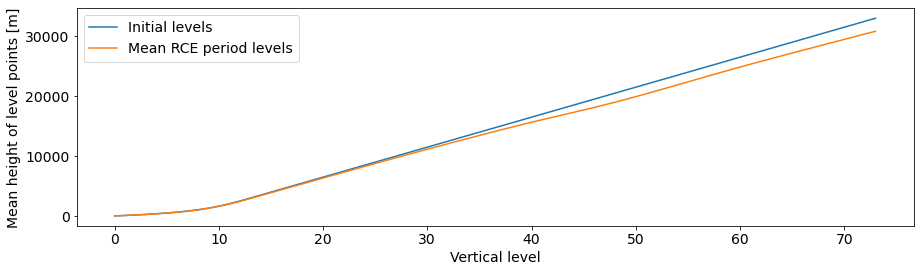

In [5]:
wp.compare_vert_levels(dat=wrfvars.sel(Dataset='RCE'), start=start_times['RCE'], end=end_times['RCE'])

### Surface temperatures

The surface is a flat water surface. We use a constant sea surface temperature (SST) set in the `namelist.input` file. The skin surface temperature (TSK) and deep soil temperature (TMN) are set to a constant value $T_s$ based on the initial surface pressure $p_s$ hPa, a reference pressure $p_0 = 100$ hPa, and surface potential temperature $\theta_s$ K, using 

$$
T_s = \theta_s \frac{p_s}{p_0}^{R_d/c_p}
$$

where $c_p$ (J kg$^{-1}$ K$^{-1}$) is specific heat capacity of dry air at constant pressure, and $R_d$ (J kg$^{-1}$ K$^{-1}$) is the gas constant for dry air.

In [6]:
wp.surface_temps(wrf_file=inputs['RCE'] + '/wrfout_d01_' + end_times['RCE'] + '_00:00:00')

Last time stamp in WRF file has SST of 301.15 K and TSK of 299.99823 K.


### Fixed radiative cooling profile

The radiative cooling profile is kept fixed in all runs, following [Herman and Kuang (2013)](https://doi.org/10.1002/jame.20037). This constant radiation profile replaces the radiation driver entirely. Instead, the value of the potential temperature tendancy due to the radiation scheme ($\theta_{\textrm{tend, rad}}$ in K s$^{-1}$) is set based on the pressure $p$ at each mass point. The value is $\theta_{tend,rad} = t/\Pi$, where $\Pi$ is the Exner function that converts temperature to potential temperature, and $t$ is a temperature tendency set as follows:

 * $t = -1.5$ K day$^{-1}$ if $p \geq 200$ hPa.
 * $t = 0$ K day$^{-1}$ if $p \leq 100$ hPa.
 * $t$'s value varies linearly between -1.5 and 0 K day$^{-1}$ from 100 to 200 hPa.
 
Because $p$ and $\Pi$ are not constant, the values of potential temperature tendency vary slightly in time and space even though the cooling is constant, and the profiles of mean $\theta_{\textrm{tend,rad}}$ are curved. Here I plot mean $\theta_{\textrm{tend,rad}}$ (called `RTHRATEN` in the WRF model).

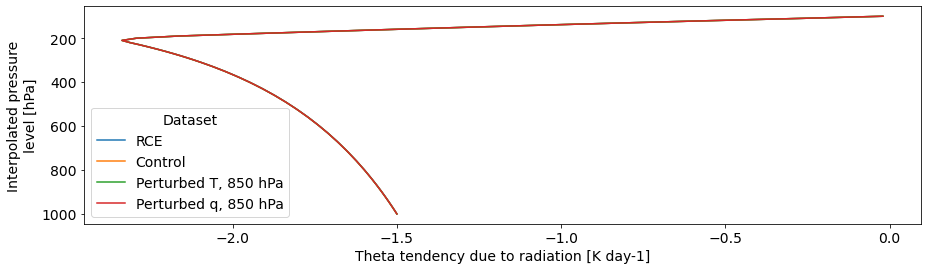

In [7]:
wp.plot_radiative_cooling_profiles(dat=wrfvars)

The value of `RTHRATEN` is zero everywhere in the first model timestep since no tendency has been provided yet by the model. This first time step is excluded from the following plot which shows the tendancy due to the radiation scheme at various levels by time.

In [8]:
wp.plot_radiative_cooling_by_level(dat=wrfvars, plot_levels=[100], figsize=[10.7,5])

ValueError: IndexVariable objects must be 1-dimensional

### Ideal evaporation / surface fluxes

We use ideal evaporation as per [Chua et al., 2019](http://dx.doi.org/10.1029/2019GL082408), such that surface wind is fixed at $W_s = 4.8$ m s$^{-1}$ and the drag coefficient is assumed to be 0.001. Then surface heat flux ($SH$) is calculated using modified Eq. 1 from Chua et al., 2019:

$$
SH = 0.001 \rho_a W c_p (T_s - T_a)
$$

where $\rho_a$ (kg m$^{-3}$) is the near surface air density, $T_s$ (K) is surface temperature (we use SST), and $T_a$ (K) is the near-surface air temperature. We use 

$$
T_a = T_l \left(\frac{p_s}{p_l}\right)^{\frac{R_d}{c_p}}
$$

where $T_l$ (K) is the temperature at the first model level above the surface, $p_s$ (hPa) is surface pressure, and $p_l$ (hPa) is pressure at the first model level. 

Latent heat flux (LH) is calculated using modified Eq. 2 from Chua et al., 2019, also assuming a drag coefficient of 0.001:

$$
LH = 0.001 \rho_a W L (q_{sat} - q_a)
$$

where $L$ is the typical latent heat of vaporization of water, $q_{sat}$ is the saturated water vapour mixing ratio at $T_s$ and $q_a$ is the water vapour mixing ratio at the lowest model level. Note that while Chua et al., 2019 assume that air density near the surface is 1 kg m$^{-3}$, we use the density value produced by WRF which is around 1.16 kg m$^{-3}$ using the current model setup.

### Wind relaxation

Horizontal winds $U$ (m s$^{-1}$) and $V$ (m s$^{-1}$) are relaxed to a given vertical profiles which are currently set to zero. The two following plots show wind magnitude by pressure level by time. Wind magnitude here is calculated using the horizontal mean of $U$ and $V$ per level and time.

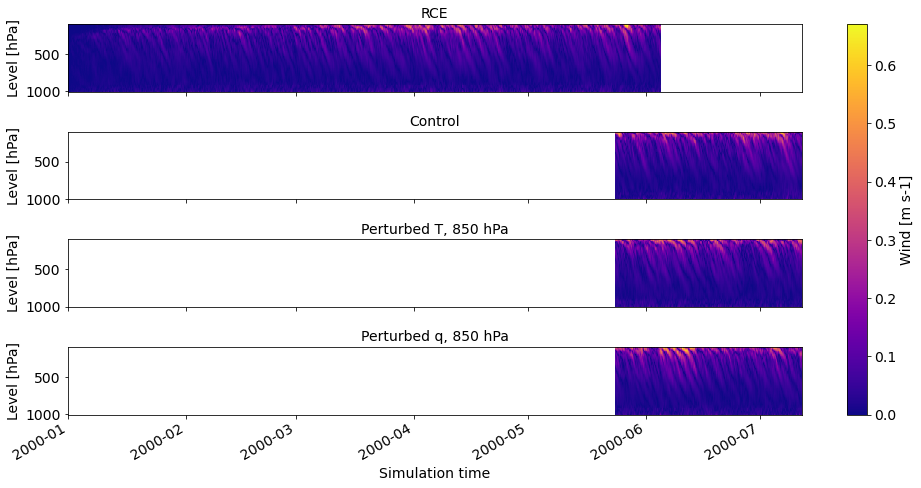

In [9]:
wind = wp.wind(dat=wrfvars)
wp.plot_wind(wind=wind, figsize=[14,7])

In the next plot I show wind magnitude per (interpolated) vertical level. Fluctuations are lower closer to the surface.

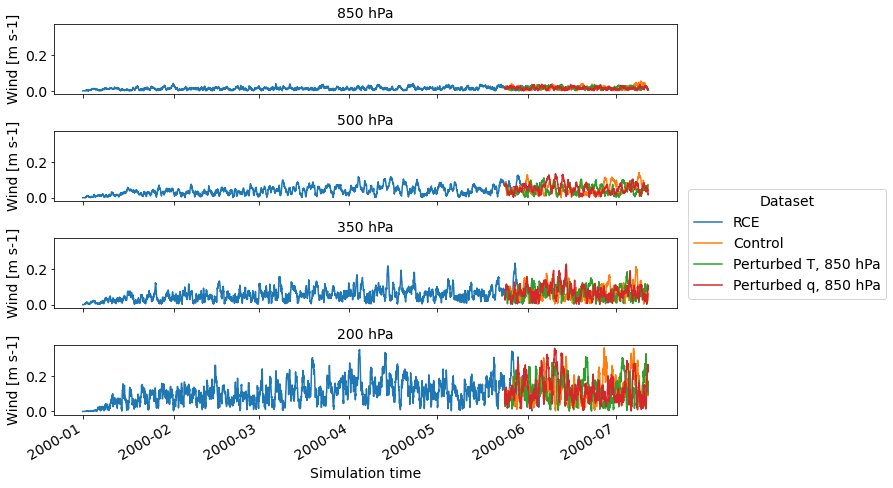

In [10]:
wp.plot_wind_levels(wind=wind, plot_levels=plot_levels, figsize=[10,7])

### Stratospheric temperature and moisture relaxation

For perturbation and control runs, but not the RCE run, potential temperature and water vapour mixing ratio $q$ are relaxed in the stratosphere (above 160 hPa) to the mean profiles from the RCE run. This relaxation follows that in following [Herman and Kuang (2013)](https://doi.org/10.1002/jame.20037). The reference profile is stored as a value for $T$ and $q$ per vertical level index, not per pressure. The assumption is that the pressure for each vertical level will not change markedly after RCE. 

Note: The RCE run was at 5 minute resolution, but the control and perturbation runs will output at 1 hour resolution. Future RCE runs will also be at 1 hour output resolution. When `wrfvars` is read, it is sampled to hourly snapshots so that all data is in hourly resolution (for $T$ and $q$ profiles, the maximum differences between five-minute and hourly mean profiles were 2.4586916e-07 kg kg-1 for q and 0.0064086914 K for T).

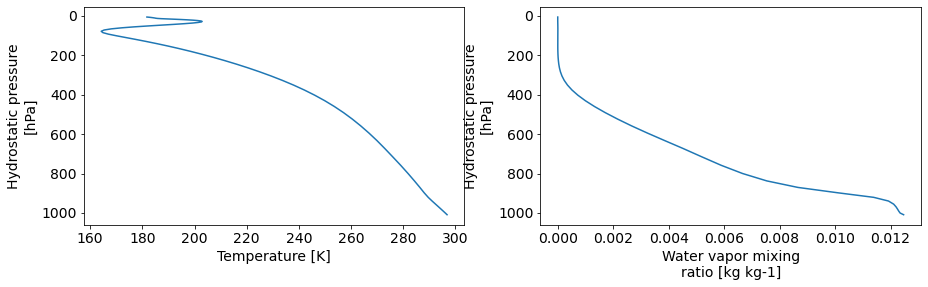

In [11]:
RCE_profiles = wp.calc_profiles(dat=wrfvars.sel(Dataset='RCE', drop=True), start=start_times['RCE'],
                                end=end_times['RCE'])

The following code block, when uncommented, will write the T and q target files to a WRF runtime directory.

In [12]:
# wp.write_Tq_profiles(profiles=RCE_profiles, 
#                      T_file='/g/data/up6/tr2908/em_quarter_ss/v4.1.4/original_1km/run/control/T_target',
#                      q_file='/g/data/up6/tr2908/em_quarter_ss/v4.1.4/original_1km/run/control/q_target')

The following plot shows mean profiles of $T$ and $q$ in at interpolated pressure levels (black line), with blue shading showing the range of the values across the entire runs and red points showing the RCE value at eta-level pressures.

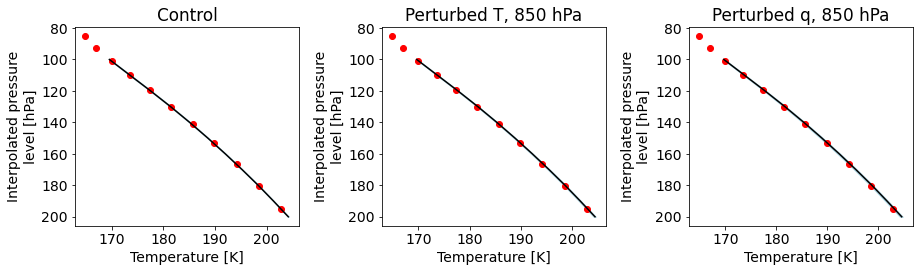

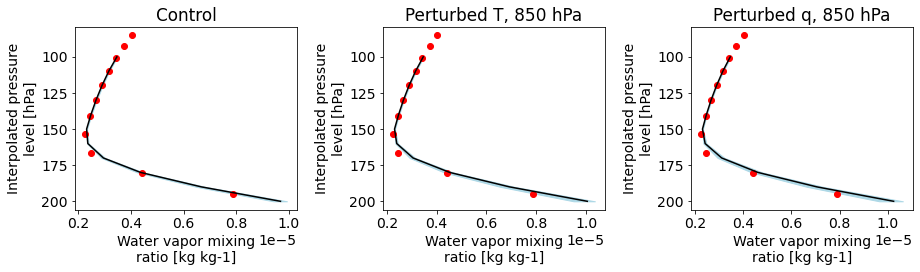

In [13]:
wp.plot_tq_stratosphere(dat=wrfvars.sel(time=slice(start_times['RCE'], None)), 
                        RCE_profiles=RCE_profiles, p_from=200, p_to=80, figsize=[13,4])

## Perturbation settings

Here are perturbation settings used in each run:

In [14]:
wp.perturbation_details(inputs)

RCE:                    No perturbation.
Control:                No perturbation.
Perturbed T, 850 hPa:   Perturbed T with amplitude 0.5 K day-1 at 850.0 hPa.
Perturbed q, 850 hPa:   Perturbed q with amplitude 0.0002 kg kg-1 day-1 at 850.0 hPa.


### Perturbed pressure level

#### Kuang 2012

In [Kuang 2012](https://doi.org/10.1175/JAS-D-11-0307.1), the forcing form is given in Appendix A:

$$
f_i = \frac{1}{2} \left\{ \delta_{ij} + \exp\left[ - \left( \frac{p_j - p_i}{75 \textrm{hPa}}\right)^2 \right] \right\}
$$

where $f_i$ is the perturbation forcing applied to the $i$th model level, $\delta_{ij}$ is a Direct delta function returns $0$ when $i \neq j$ and $1$ when $i = j$, and $p_j$ and $p_i$ are pressure at the $j$th and $i$th levels respectively (hPa). The point around which to perturb is chosen by selecting a level $j$ which will receive the maximum perturbation. 

#### Herman and Kuang 2013

A similar equation is shown in [Herman and Kuang 2013](https://doi.org/0.1002/jame.20037) Equation 4, and although they claim it is identical to the above equation it is missing the division by two, so it is written

$$
f_i = \delta_{ij} + \exp\left[ - \left( \frac{p_j - p_i}{75 \textrm{hPa}}\right)^2 \right]
$$

#### Our choice of basis function

Because the pressure levels in our model are not exactly at the points around which we want to perturb, I have adapted this form so that only the Gaussian portion of the function is used, and instead of selecting a level $k$ we select a pressure $p_p$ (hPa) around which to perturb:

$$
f_i = \exp\left[ - \left( \frac{p_p - p_i}{75 \textrm{hPa}}\right)^2 \right]
$$

The following plot shows the difference made by this change in the shape of the perturbation forcing by pressure.

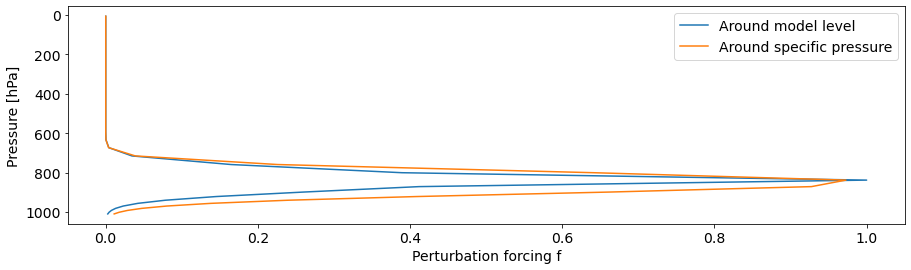

In [15]:
wp.compare_perturbation_forcing(dat=wrfvars, p_pert=850, k_pert=10)

The model pressure at the kth eta level will vary slightly in space and time. Here is the range of pressure values observed for this level in the perturbed run, and a plot of the minimum and maximum values.

## Radiative-convective equilibrium (RCE)

### Time series of precipitable water

To determine when the simulations have reached RCE, we look for stabilisation of the precipitable water (PW) field. Here is spatially-averaged PW by time for each simulation. The green highlighted region is the time span over which average profiles are calculated for the control run, the red region the time over which profiles are averaged for the perturbed runs.

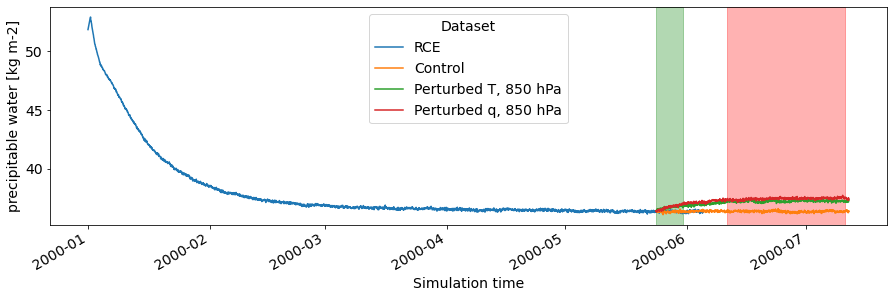

In [16]:
wrfvars.pw.plot(hue='Dataset')
plt.axvspan(xmin=start_times['RCE'], xmax=end_times['RCE'], alpha=0.3, color='green')
plt.axvspan(xmin=start_times['Control'], xmax=end_times['Control'], alpha=0.3, color='red')
plt.show()

### Convective structure during RCE

Since we do not use the radiation driver, outgoing longwave radiation (OLR) is not calculated in our runs and it is not trivial to visualise the locations of convection. Instead we plot the location of rainfall calculated (without the convective scheme) for the last day of each RCE period. The x and y axes in these plots are pixel numbers.

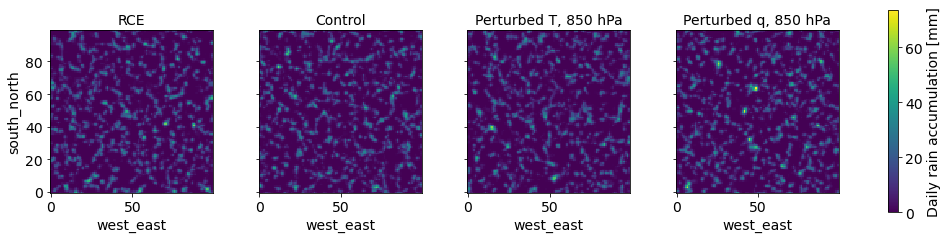

In [17]:
patterns = inputs.copy()
patterns['RCE'] = 'wrfout*' + end_times['RCE'] + "*"
patterns['Control'] = 'wrfout*' + end_times['Control'] + "*"
patterns['Perturbed T, 850 hPa'] = 'wrfout*' + end_times['Perturbed T, 850 hPa'] + "*"
patterns['Perturbed q, 850 hPa'] = 'wrfout*' + end_times['Perturbed q, 850 hPa'] + "*"

wp.plot_daily_rain(inputs=inputs, patterns=patterns)

## Other profiles by time

### Temperature

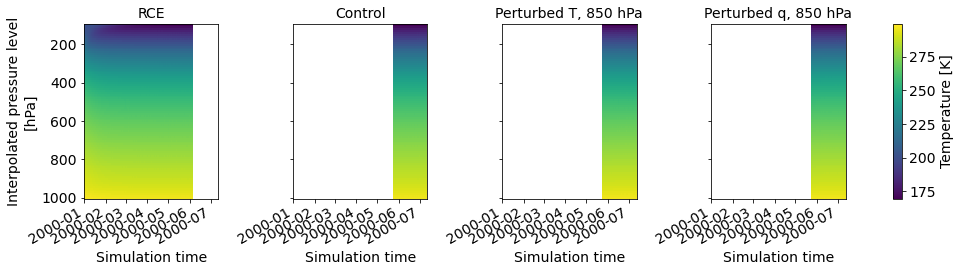

In [18]:
wrfvars.tk.plot(col='Dataset', x='time', figsize=wp.FIGURE_SIZE, yincrease=False).set_titles('{value}')
plt.show()

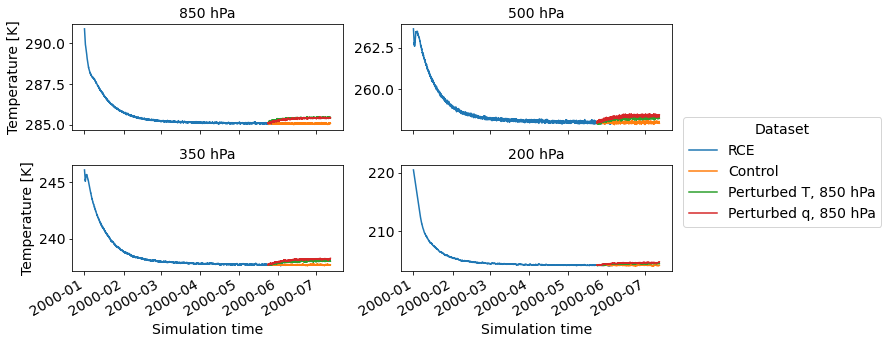

In [19]:
wrfvars.tk.sel(level=plot_levels).plot(hue='Dataset', col='level', col_wrap=2, figsize=[10,5], 
                                       sharey=False).set_titles('{value} hPa')
plt.show()

### Water vapour mixing ratio

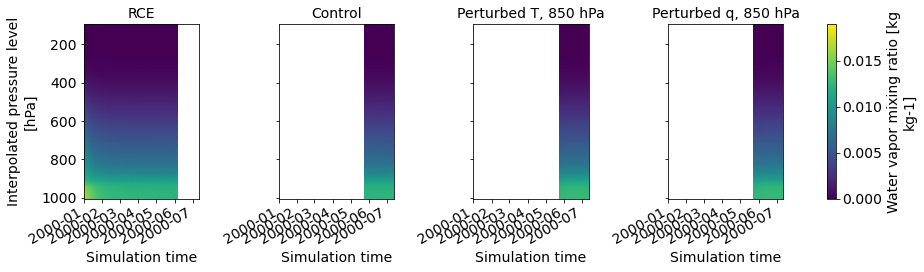

In [20]:
wrfvars.q.plot(col='Dataset', x='time', figsize=[14,4], yincrease=False).set_titles('{value}')
plt.show()

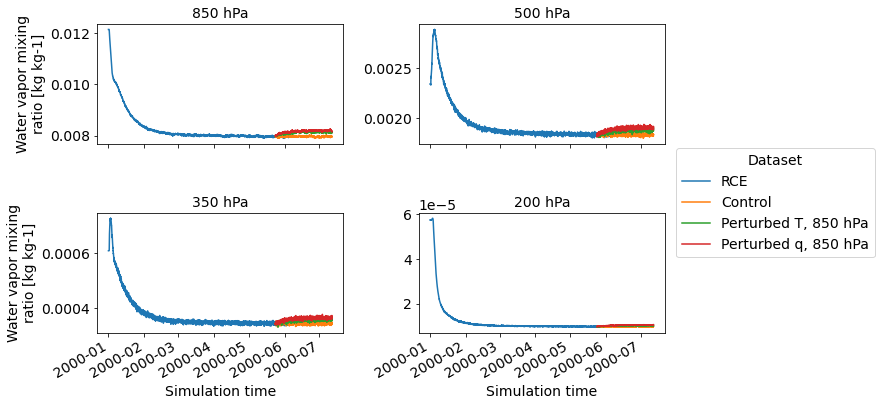

In [21]:
wrfvars.q.sel(level=plot_levels).plot(hue='Dataset', col='level', col_wrap=2, sharey=False,
                                      figsize=[10,6]).set_titles('{value} hPa')
wp.rewrap_labels(plt.gcf().axes, length_y=20)
plt.show()

### Relative humidity

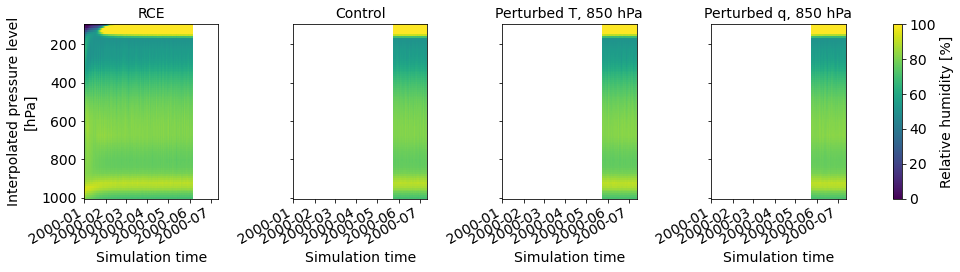

In [22]:
wrfvars.rh.plot(y='level', col='Dataset', figsize=wp.FIGURE_SIZE, yincrease=False).set_titles('{value}')
plt.show()

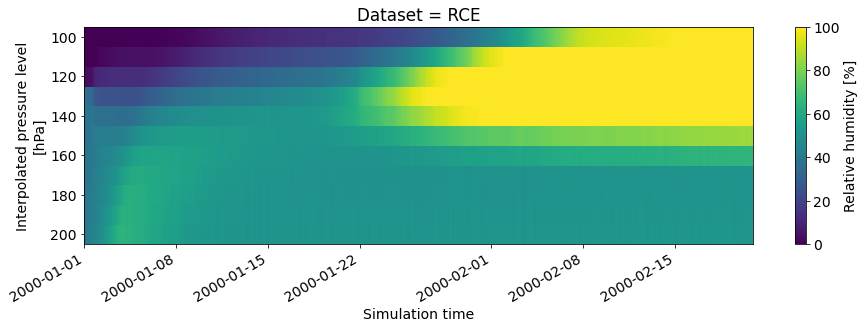

In [29]:
wrfvars.rh.sel(level=slice(200,0), Dataset='RCE', 
               time=slice('2000-01-01', '2000-02-20')).plot(y='level', 
                                                            figsize=wp.FIGURE_SIZE, yincrease=False)
plt.show()

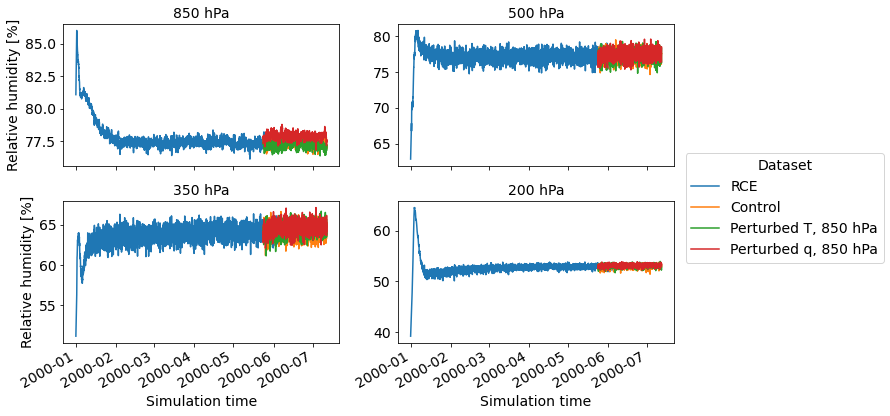

In [23]:
wrfvars.rh.sel(level=plot_levels).plot(col='level', hue='Dataset', col_wrap=2, sharey=False,
                                       figsize=[10,6]).set_titles('{value} hPa')
wp.rewrap_labels(plt.gcf().axes, length_y=25)
plt.show()

## Mean temperature and humidity profiles over RCE periods

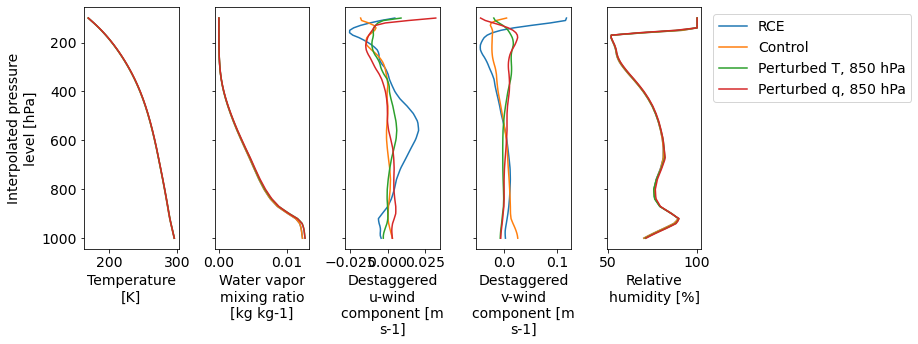

In [24]:
wp.plot_profiles(dat=wrfvars, start=start_times, end=end_times, figsize=[13,5])

## Perturbation differences in averaged RCE profiles

Differences here are defined as `perturbed - control`. The red vertical line shows zero difference.

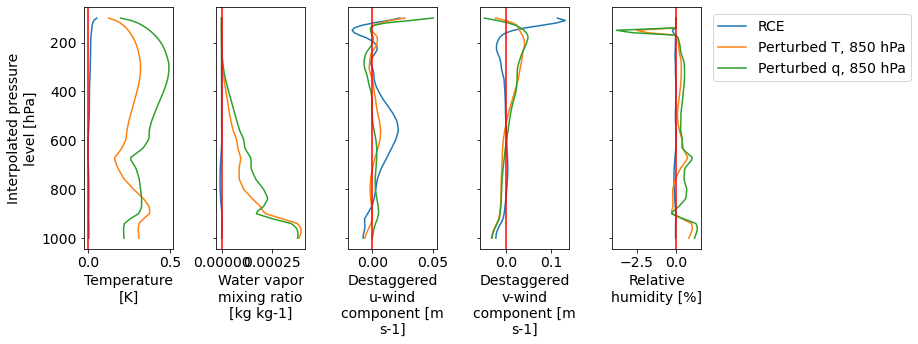

In [25]:
wp.compare_profiles(wrfvars, start=start_times, end=end_times, figsize=[13,5])

## Todo

- Add code to ensure that T_target, q_target, U_target, V_target are all the same between runs.
- Remove `calc_profiles` and use `profiles_by_dataset` instead.
- Rerun 1km simulations using statospheric relaxation in the RCE run. This should avoid the temperatures getting too low.